In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'C:\Users\Sreeram Krishnaswamy\Downloads\AnalyticsGKData - Sheet1.csv')

In [15]:
df.head()

,Player,Team,PSxG,Goals Prevented
0,Rui Patrício\79b0d6a0,Roma,27.4,-1.6
1,Salvatore Sirigu\10dc46f0,Genoa,37.1,-5.9
2,Guglielmo Vicario\77d6fd4d,Empoli,44.7,1.7
3,Andrea Consigli\8cabdc1e,Sassuolo,35.1,-2.9
4,Thibaut Courtois\1840e36d,Real Madrid,21.1,1.1


In [16]:
df['Player']=df['Player'].str.split('\\',expand=True)[0]
df.head()

,Player,Team,PSxG,Goals Prevented
0,Rui Patrício,Roma,27.4,-1.6
1,Salvatore Sirigu,Genoa,37.1,-5.9
2,Guglielmo Vicario,Empoli,44.7,1.7
3,Andrea Consigli,Sassuolo,35.1,-2.9
4,Thibaut Courtois,Real Madrid,21.1,1.1


In [17]:
psxg=list(df['PSxG'])

In [18]:
psxg

[27.4,
 37.1,
 44.7,
 35.1,
 21.1,
 29.6,
 12.5,
 31.4,
 28.9,
 38.5,
 18.4,
 26.9,
 38.7,
 27.6,
 25.7,
 34.3,
 21.1,
 21.9,
 28.3,
 23.0,
 27.7,
 36.1,
 20.0,
 31.4,
 18.3,
 27.0,
 28.8,
 39.3,
 36.0,
 30.9,
 27.3,
 27.1,
 25.9,
 26.8,
 18.0,
 22.3,
 21.6,
 40.8,
 24.5,
 40.6,
 17.8,
 22.2,
 20.5,
 24.3,
 18.8,
 30.0,
 34.9,
 24.3,
 26.2,
 33.2,
 25.3,
 15.7,
 17.4,
 30.4,
 14.3,
 29.9,
 33.6,
 32.6,
 19.8,
 32.4,
 29.9,
 31.0,
 27.5,
 26.1,
 20.7,
 34.0,
 17.6,
 16.1,
 14.0,
 24.4,
 29.9,
 23.5,
 12.1,
 16.9,
 18.7,
 29.9,
 22.3,
 16.5,
 21.6,
 20.4,
 23.5,
 21.5,
 20.8,
 24.2]

In [19]:
gp=list(df['Goals Prevented'])
gp
player=list(df['Player'])
player

['Rui Patrício',
 'Salvatore Sirigu',
 'Guglielmo Vicario',
 'Andrea Consigli',
 'Thibaut Courtois',
 'Matías Dituro',
 'Ederson',
 'Łukasz Fabiański',
 'Gauthier Gallon',
 'David de Gea',
 'Samir Handanović',
 'Alban Lafont',
 'Jeremías Ledesma',
 'Alexander Nübel',
 'Predrag Rajković',
 'Łukasz Skorupski',
 'David Soria',
 'Walter Benítez',
 'Marco Bizot',
 'Sergio Herrera',
 'Diego López',
 'Illan Meslier',
 'Vanja Milinković-Savić',
 'Paul Nardi',
 'Jan Oblak',
 'Matz Sels',
 'Anthony Lopes',
 'Benoît Costil',
 'Alessio Cragno',
 'Rafał Gikiewicz',
 'Ivo Grbić',
 'Hugo Lloris',
 'Emiliano Martínez',
 'Lorenzo Montipò',
 'Gerónimo Rulli',
 'José Sá',
 'Robert Sánchez',
 'Alexander Schwolow',
 'Marco Silvestri',
 'Yann Sommer',
 'Wojciech Szczęsny',
 'Robin Zentner',
 'Juan Musso',
 'Jean-Louis Leca',
 'Alisson',
 'Oliver Baumann',
 'Vid Belec',
 'Vicente Guaita',
 'Péter Gulácsi',
 'Lukáš Hrádecký',
 'Andreas Luthe',
 'Edouard Mendy',
 'Manuel Neuer',
 'Stefan Ortega',
 'David Ospin

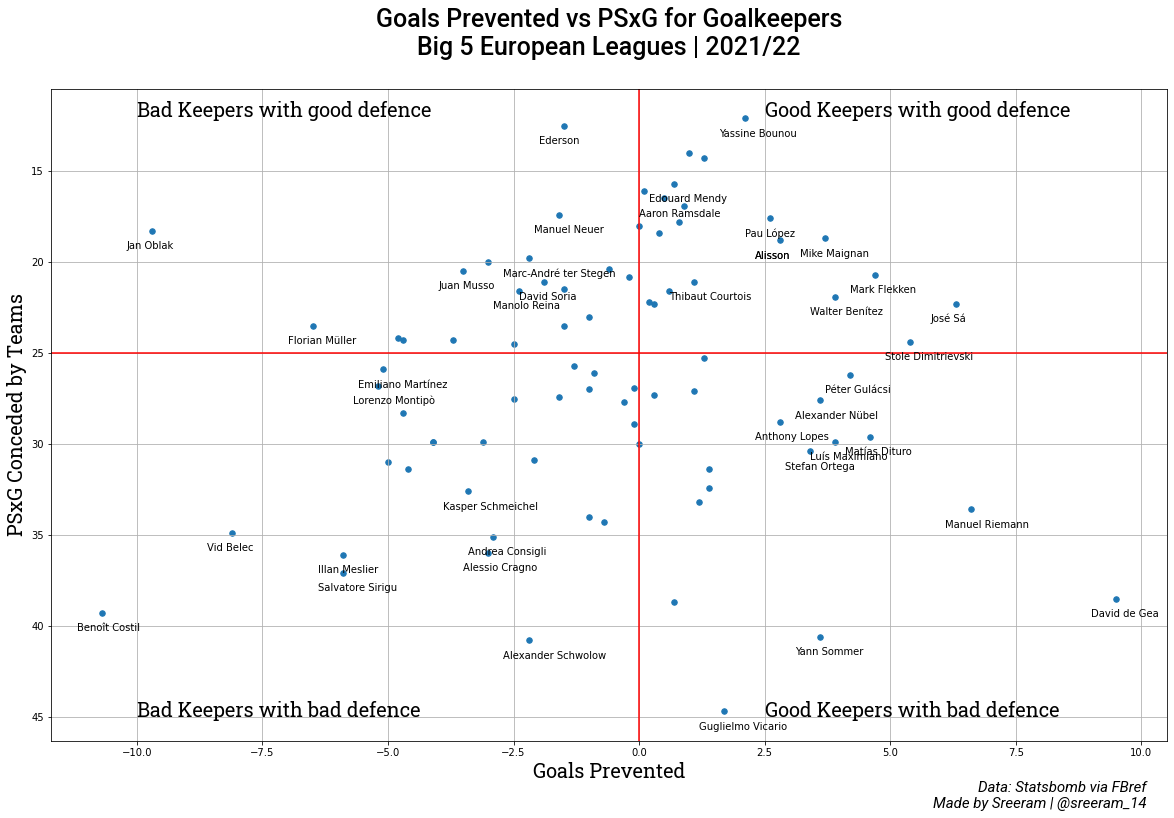

In [38]:
df.plot.scatter('Goals Prevented','PSxG',  s=30, figsize=(20,12))


plt.title('Goals Prevented vs PSxG for Goalkeepers\nBig 5 European Leagues | 2021/22\n', fontsize=25,fontproperties=font_bold.prop,color="#000000")
plt.xlabel("Goals Prevented",fontsize=20,fontproperties=font_normal.prop)
plt.ylabel("PSxG Conceded by Teams",fontsize=20,fontproperties=font_normal.prop)
plt.grid(True) # add gridlines
plt.gca().invert_yaxis()
plt.axhline(y=25, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
plt.text(2.5,12,'Good Keepers with good defence', fontsize=20,fontproperties=font_normal.prop)
plt.text(2.5,45,'Good Keepers with bad defence', fontsize=20,fontproperties=font_normal.prop)
plt.text(-10,12,'Bad Keepers with good defence', fontsize=20,fontproperties=font_normal.prop)
plt.text(-10,45,'Bad Keepers with bad defence', fontsize=20, fontproperties=font_normal.prop)

for i in range(len(psxg)):
            if((psxg[i]>32 or psxg[i]<23 or gp[i]>1 or gp[i]<-5) and player[i]!='Vanja Milinković-Savić'):
               if(gp[i]>1.5 or gp[i]<-1.5 or (gp[i]<0 and psxg[i]<20)):
                    plt.annotate(player[i], (gp[i]-.5, psxg[i]+1),fontsize=10)
            if(player[i] in ['Aaron Ramsdale','Thibaut Courtois', 'Edouard Mendy', 'Alisson']):
                 plt.annotate(player[i], (gp[i]-.5, psxg[i]+1),fontsize=10)

CREDIT_1 = "Data: Statsbomb via FBref"
CREDIT_2 = "Made by Sreeram | @sreeram_14"                    
plt.text(
    10.1, 50, f"{CREDIT_1}\n{CREDIT_2}", size=15,
    color="#000000",
    fontproperties=font_italic.prop,
    ha="right"
)                   

plt.show()

In [37]:
from mplsoccer import FontManager

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))